<a href="https://colab.research.google.com/github/Salsabilaurelia1408/tugasakhirsalsa/blob/main/baseline_FIX_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, SimpleRNN, Dropout


              WOPR  WWPR   WGPR  GOR   WBHP
Date                                       
2015-07-06  1314.0   0.0  0.240  183  323.0
2015-07-07  1321.0   0.0  0.260  197  335.0
2015-07-08  1309.0   0.0  0.247  189  343.0
2015-07-09  1299.0   0.0  0.233  179  348.0
2015-07-10  1287.0   0.0  0.240  186  349.0
...            ...   ...    ...  ...    ...
2017-05-17   501.2  13.1  0.315  628  239.0
2017-05-18   501.3  12.4  0.313  624  240.0
2017-05-19   500.2  12.5  0.314  628  239.0
2017-05-20   503.1  11.5  0.311  618  241.0
2017-05-21   503.1  11.5  0.311  618  241.0

[629 rows x 5 columns]


<Axes: xlabel='Date'>

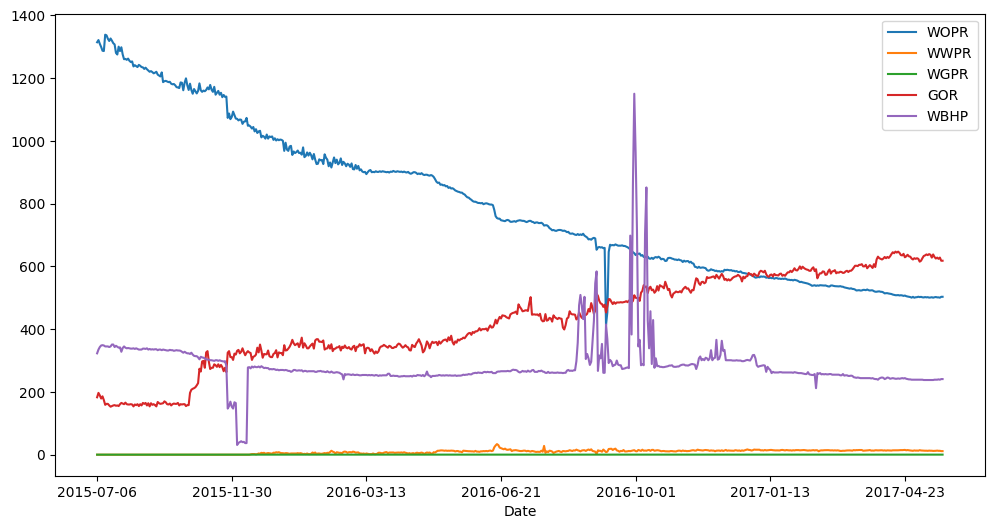

In [9]:
# Load data
url ='https://raw.githubusercontent.com/Salsabilaurelia1408/tugasakhirsalsa/main/WOPR2_DateFormatRevised.csv'

df = pd.read_csv(url, index_col='Time', parse_dates=True)
df.set_index('Date', inplace=True)
df.index.freq ='MS'

print(df)

df.plot(figsize=(12,6))

In [10]:
# Define input and output variables
X = df[['WOPR', 'WBHP', 'WWPR', 'WGPR', 'GOR']]
Y = df['WOPR']


# Normalize data
scaler = MinMaxScaler(feature_range=(0,1))
X_scaled = scaler.fit_transform(X)
Y_scaled = scaler.fit_transform(np.array(Y).reshape(-1,1))


In [11]:
# Reshape data to fit the input shape of the models
def reshape_data(data):
    X = []
    Y = []
    for i in range(look_back, len(data)):
        X.append(data[i-look_back:i, :])
        Y.append(data[i, 0])
    return np.array(X), np.array(Y)

# Define training and testing data
train_size = int(len(df) * 0.7)  # 80% for training, 20% for testing
dev_size = int(len(df)*0.15)
test_size = int(len(df)-(train_size+dev_size))

look_back = 10
X_train = X_scaled[:train_size]
Y_train = Y_scaled[look_back:train_size + look_back]
X_dev = X_scaled[train_size : train_size + dev_size]
Y_dev = Y_scaled[train_size + look_back : train_size + dev_size + look_back]
X_test = X_scaled[train_size + dev_size:]
Y_test = Y_scaled[train_size + dev_size + look_back:]

X_train, Y_train = reshape_data(X_train)
X_dev, Y_dev = reshape_data(X_dev)
X_test, Y_test = reshape_data(X_test)


# Define LSTM model
model_LSTM = Sequential()
model_LSTM.add(LSTM(50, activation='linear', input_shape=(look_back, 5)))
model_LSTM.add(Dense(1))
model_LSTM.add(Dropout(0.2))
model_LSTM.compile(optimizer='adam', loss='mse', metrics =['mae', 'accuracy'])

# Define GRU model
model_GRU = Sequential()
model_GRU.add(GRU(50, activation='linear', input_shape=(look_back, 5)))
model_GRU.add(Dense(1))
model_LSTM.add(Dropout(0.2))
model_GRU.compile(optimizer='adam', loss='mse', metrics =['mae', 'accuracy'])

# Define Vanilla RNN model
model_Vanilla = Sequential()
model_Vanilla.add(SimpleRNN(50, activation='linear', input_shape=(look_back, 5)))
model_Vanilla.add(Dense(1))
model_LSTM.add(Dropout(0.2))
model_Vanilla.compile(optimizer='adam', loss='mse', metrics =['mae', 'accuracy'])

# Train the models
history_LSTM = model_LSTM.fit(X_train, Y_train, epochs=50, batch_size=32, validation_data=(X_dev, Y_dev), verbose=1, shuffle = False)
history_GRU = model_GRU.fit(X_train, Y_train, epochs=50, batch_size =32, validation_data=(X_dev, Y_dev), verbose=1, shuffle = False)
history_Vanilla = model_Vanilla.fit(X_train, Y_train, epochs=50, batch_size=32, validation_data=(X_dev, Y_dev), verbose=1, shuffle = False)

# Predict using the models
Y_pred_LSTM = model_LSTM.predict(X_test)
Y_pred_GRU = model_GRU.predict(X_test)
Y_pred_Vanilla = model_Vanilla.predict(X_test)

# Reshape predicted and actual values
Y_pred_LSTM = scaler.inverse_transform(Y_pred_LSTM.reshape(-1, 1))
Y_pred_GRU = scaler.inverse_transform(Y_pred_GRU.reshape(-1, 1))
Y_pred_Vanilla = scaler.inverse_transform(Y_pred_Vanilla.reshape(-1, 1))
Y_test = scaler.inverse_transform(Y_test.reshape(-1, 1))



Epoch 1/50
14/14 [==============================] - 4s 63ms/step - loss: 0.2009 - mae: 0.3824 - accuracy: 0.0023 - val_loss: 0.0084 - val_mae: 0.0906 - val_accuracy: 0.0000e+00
Epoch 2/50
14/14 [==============================] - 0s 19ms/step - loss: 0.1738 - mae: 0.3321 - accuracy: 0.0023 - val_loss: 0.0032 - val_mae: 0.0554 - val_accuracy: 0.0000e+00
Epoch 3/50
14/14 [==============================] - 0s 30ms/step - loss: 0.1585 - mae: 0.2993 - accuracy: 0.0023 - val_loss: 0.0049 - val_mae: 0.0686 - val_accuracy: 0.0000e+00
Epoch 4/50
14/14 [==============================] - 0s 14ms/step - loss: 0.1643 - mae: 0.2973 - accuracy: 0.0023 - val_loss: 0.0017 - val_mae: 0.0395 - val_accuracy: 0.0000e+00
Epoch 5/50
14/14 [==============================] - 0s 16ms/step - loss: 0.1500 - mae: 0.2596 - accuracy: 0.0023 - val_loss: 0.0054 - val_mae: 0.0729 - val_accuracy: 0.0000e+00
Epoch 6/50
14/14 [==============================] - 0s 16ms/step - loss: 0.1616 - mae: 0.2756 - accuracy: 0.0023 - 

3/3 [==============================] - 0s 5ms/step


3/3 [==============================] - 0s 4ms/step


In [12]:
'''
# Denormalize the predicted and actual values
Y_pred_LSTM = scaler.inverse_transform(Y_pred_LSTM)
Y_pred_GRU = scaler.inverse_transform(Y_pred_GRU)
Y_pred_Vanilla = scaler.inverse_transform(Y_pred_Vanilla)
Y_test = scaler.inverse_transform(Y_test)
'''

'\n# Denormalize the predicted and actual values\nY_pred_LSTM = scaler.inverse_transform(Y_pred_LSTM)\nY_pred_GRU = scaler.inverse_transform(Y_pred_GRU)\nY_pred_Vanilla = scaler.inverse_transform(Y_pred_Vanilla)\nY_test = scaler.inverse_transform(Y_test)\n'

LSTM Model Loss: [266327.84375, 515.9124755859375, 0.0]
GRU Model Loss: [266287.03125, 515.8732299804688, 0.0]
Vanilla RNN Model Loss: [266187.6875, 515.7766723632812, 0.0]
LSTM Model Loss_val: [0.00674851518124342, 0.08156422525644302, 0.0]
GRU Model Loss_val: [0.00013222456618677825, 0.010957860387861729, 0.0]
Vanilla RNN Model Loss_val: [0.0044637094251811504, 0.06594637781381607, 0.0]


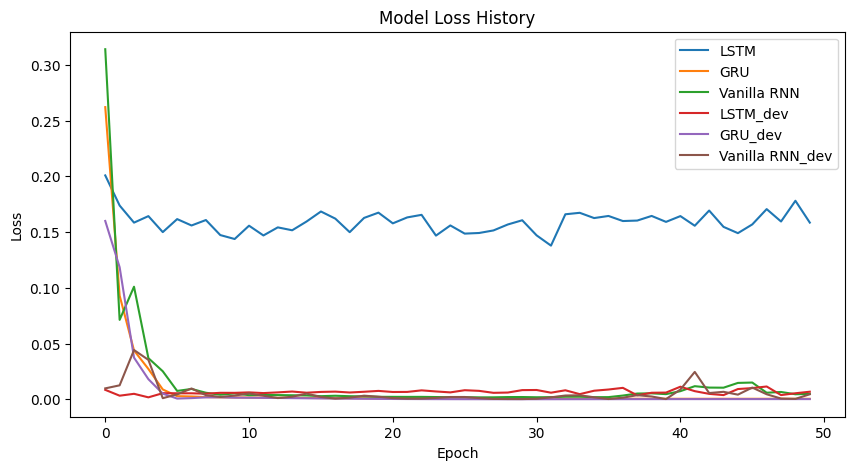

In [13]:
# Evaluate the models
loss_LSTM = model_LSTM.evaluate(X_test, Y_test, verbose=0)
loss_GRU = model_GRU.evaluate(X_test, Y_test, verbose=0)
loss_Vanilla = model_Vanilla.evaluate(X_test, Y_test, verbose=0)
loss_LSTM_val = model_LSTM.evaluate(X_dev, Y_dev, verbose=0)
loss_GRU_val = model_GRU.evaluate(X_dev, Y_dev, verbose=0)
loss_Vanilla_val = model_Vanilla.evaluate(X_dev, Y_dev, verbose=0)

print('LSTM Model Loss:', loss_LSTM)
print('GRU Model Loss:', loss_GRU)
print('Vanilla RNN Model Loss:', loss_Vanilla)
print('LSTM Model Loss_val:', loss_LSTM_val)
print('GRU Model Loss_val:', loss_GRU_val)
print('Vanilla RNN Model Loss_val:', loss_Vanilla_val)

# Plot the loss history of each model
plt.figure(figsize=(10,5))
plt.plot(history_LSTM.history['loss'], label='LSTM')
plt.plot(history_GRU.history['loss'], label='GRU')
plt.plot(history_Vanilla.history['loss'], label='Vanilla RNN')
plt.plot(history_LSTM.history['val_loss'], label='LSTM_dev')
plt.plot(history_GRU.history['val_loss'], label='GRU_dev')
plt.plot(history_Vanilla.history['val_loss'], label='Vanilla RNN_dev')
plt.title('Model Loss History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

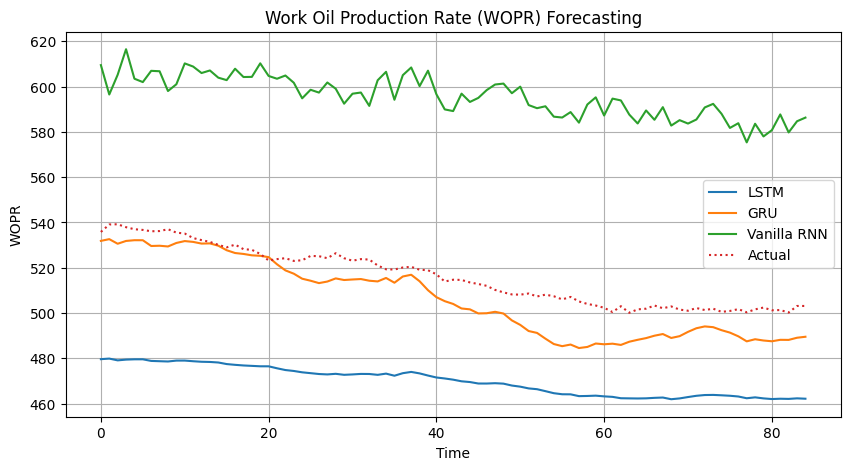

In [14]:

# Plot the predicted and actual values
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(Y_pred_LSTM, label='LSTM')
plt.plot(Y_pred_GRU, label='GRU')
plt.plot(Y_pred_Vanilla, label='Vanilla RNN')
plt.plot(Y_test, label='Actual', ls= "dotted")
plt.title('Work Oil Production Rate (WOPR) Forecasting')
plt.xlabel('Time')
plt.ylabel('WOPR')
plt.grid(True)
plt.legend()
plt.show()